# Data Wrangling - Dunkin SEO Project

## Overview
The marketing department (MD) at Dunkin donuts noticed that some of their keyword rankings have dropped over the past 6 months. Therefore, they are engaging in a new SEO program to focus on keywords that dropped to page two on Google. To do this, a predictive model will be developed using training data to predict the keywords that have the potential to drive the most traffic to the website. These keywords will then be focused on for a comprehensive SEO program for the next six months.

 The data science approach will be utilized to solve this business problem by applying a predictive model to the training data, which will include all keywords except page 2 rankings. Then the results will be applied to page 2 rankings to determine the best keywords to focus on. Success will be determined by improving keyword ranking to page one of google within one year.
 
 The Data Wrangling process will include the following steps:
 <ol><li>Loading the necessary packages</li>
    <li>Load data</li>
    <li> View data and metadata </li>
    <li> Drop unnecessary columns </li></ol>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [3]:
# setup 
#sns.set_style(style="whitegrid")
sns.set_style('ticks')

# display charts inline
%matplotlib inline

# to display all columns
pd.set_option('display.max_columns', None)

In [4]:
#load the data
df=pd.read_csv('dunkin.csv')
#look at the column names
df.columns


Index(['Keyword', 'Position', 'Previous position', 'Search Volume',
       'Keyword Difficulty', 'CPC', 'URL', 'Traffic', 'Traffic (%)',
       'Traffic Cost', 'Competition', 'Number of Results', 'Trends',
       'Timestamp', 'SERP Features by Keyword'],
      dtype='object')

## First look at the data

In [5]:
df.head()

,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Traffic (%),Traffic Cost,Competition,Number of Results,Trends,Timestamp,SERP Features by Keyword
0,dunkin donuts,1,1,2740000,88.99,2.24,https://www.dunkindonuts.com/,2192000,37.27,4910080,0.09,35000000,"[55,45,45,45,45,55,45,45,55,55,82,100]",8/30/2020,"Knowledge panel, Top stories, Image pack, Twee..."
1,dunkin donuts near me,1,1,823000,83.58,2.32,https://www.dunkindonuts.com/en/locations,658400,11.19,1527488,0.01,85,"[100,100,100,82,82,82,82,67,67,67,82,100]",8/30/2020,"Local pack, Image pack, Site links, People als..."
2,dunkin donuts menu,1,1,550000,86.33,1.78,https://www.dunkindonuts.com/en/menu,440000,7.48,783200,0.02,30200000,"[55,55,55,67,67,55,55,55,55,67,82,100]",8/30/2020,"Image pack, Video, FAQ"
3,donuts,1,1,823000,81.85,1.54,https://www.dunkindonuts.com/,386810,6.57,595687,0.04,321000000,"[82,82,82,82,82,67,82,82,67,67,82,100]",8/30/2020,"Local pack, Top stories, Image pack, Site link..."
4,dd,1,1,301000,84.47,2.53,https://www.dunkindonuts.com/,240800,4.09,609224,0.02,871000000,"[67,67,55,55,55,67,55,55,67,67,100,82]",8/30/2020,"Knowledge panel, Video Carousel, People also ask"


In [6]:
#metadata 15 columns 10000 records

df.info()
#missing data for SERP Features by Keyword, but this column will be dropped because it isn't relevant for the analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Keyword                   10000 non-null  object 
 1   Position                  10000 non-null  int64  
 2   Previous position         10000 non-null  int64  
 3   Search Volume             10000 non-null  int64  
 4   Keyword Difficulty        10000 non-null  float64
 5   CPC                       10000 non-null  float64
 6   URL                       10000 non-null  object 
 7   Traffic                   10000 non-null  int64  
 8   Traffic (%)               10000 non-null  float64
 9   Traffic Cost              10000 non-null  int64  
 10  Competition               10000 non-null  float64
 11  Number of Results         10000 non-null  int64  
 12  Trends                    10000 non-null  object 
 13  Timestamp                 10000 non-null  object 
 14  SERP Fe

## Dropping Unecessary Columns

We are interested in most of the column values, but there are a few that will not help with the present analysis. Therefore, we will drop the following two columns:
<li> Trends </li>
<li> SERP Features by Keyword</li>


In [8]:
#drop two columns
df.drop(df[['Trends', 'SERP Features by Keyword']], inplace=True, axis=1)


In [9]:
df.columns

Index(['Keyword', 'Position', 'Previous position', 'Search Volume',
       'Keyword Difficulty', 'CPC', 'URL', 'Traffic', 'Traffic (%)',
       'Traffic Cost', 'Competition', 'Number of Results', 'Timestamp'],
      dtype='object')

In [11]:
#no more missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keyword             10000 non-null  object 
 1   Position            10000 non-null  int64  
 2   Previous position   10000 non-null  int64  
 3   Search Volume       10000 non-null  int64  
 4   Keyword Difficulty  10000 non-null  float64
 5   CPC                 10000 non-null  float64
 6   URL                 10000 non-null  object 
 7   Traffic             10000 non-null  int64  
 8   Traffic (%)         10000 non-null  float64
 9   Traffic Cost        10000 non-null  int64  
 10  Competition         10000 non-null  float64
 11  Number of Results   10000 non-null  int64  
 12  Timestamp           10000 non-null  object 
dtypes: float64(4), int64(6), object(3)
memory usage: 1015.8+ KB


In [14]:
#save the updated data

# checkpoint 3
checkpoint_3_df = df.copy()
checkpoint_3_df.to_csv('dunkindataclean.csv')

## Exploratory Data Analysis - Dunkin SEO Project

In [33]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, calendar
import plotly
import plotly.graph_objs as go

# setup 
plotly.offline.init_notebook_mode(connected=True)
#sns.set_style(style="whitegrid")
sns.set_style('ticks')
sns.set_palette('bright')

# display charts inline
%matplotlib inline

# to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
plt.rcParams["figure.figsize"] = (10,10)

## Let's take a look at the data

In [15]:

#load clean data

df=pd.read_csv('dunkindataclean.csv')
df.head(50)

,Unnamed: 0,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Traffic (%),Traffic Cost,Competition,Number of Results,Timestamp
0,0,dunkin donuts,1,1,2740000,88.99,2.24,https://www.dunkindonuts.com/,2192000,37.27,4910080,0.09,35000000,8/30/2020
1,1,dunkin donuts near me,1,1,823000,83.58,2.32,https://www.dunkindonuts.com/en/locations,658400,11.19,1527488,0.01,85,8/30/2020
2,2,dunkin donuts menu,1,1,550000,86.33,1.78,https://www.dunkindonuts.com/en/menu,440000,7.48,783200,0.02,30200000,8/30/2020
3,3,donuts,1,1,823000,81.85,1.54,https://www.dunkindonuts.com/,386810,6.57,595687,0.04,321000000,8/30/2020
4,4,dd,1,1,301000,84.47,2.53,https://www.dunkindonuts.com/,240800,4.09,609224,0.02,871000000,8/30/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,45,what time does dunkin donuts close,1,1,8100,86.64,0.00,https://www.dunkindonuts.com/en/locations,6480,0.11,0,0.00,37900000,8/30/2020
46,46,24 hour dunkin donuts,1,1,6600,86.08,0.00,https://www.dunkindonuts.com/en/locations,5280,0.08,0,0.00,6380000,8/30/2020
47,47,dunkin donuts order online,1,5,6600,82.35,2.49,https://news.dunkindonuts.com/news/dunkin-donu...,5280,0.08,13147,0.23,17300000,8/30/2020
48,48,dunkin donuts open near me,1,1,6600,86.53,0.00,https://www.dunkindonuts.com/en/locations,5280,0.08,0,0.00,29300000,8/30/2020


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   Keyword             10000 non-null  object 
 2   Position            10000 non-null  int64  
 3   Previous position   10000 non-null  int64  
 4   Search Volume       10000 non-null  int64  
 5   Keyword Difficulty  10000 non-null  float64
 6   CPC                 10000 non-null  float64
 7   URL                 10000 non-null  object 
 8   Traffic             10000 non-null  int64  
 9   Traffic (%)         10000 non-null  float64
 10  Traffic Cost        10000 non-null  int64  
 11  Competition         10000 non-null  float64
 12  Number of Results   10000 non-null  int64  
 13  Timestamp           10000 non-null  object 
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4.999500e+03,2.886896e+03,0.00,2499.7500,4999.500,7499.25,9.999000e+03
Position,10000.0,5.187130e+01,3.297794e+01,1.00,20.0000,59.000,81.00,1.000000e+02
Previous position,10000.0,5.082950e+01,3.340215e+01,0.00,17.0000,57.000,81.00,1.000000e+02
Search Volume,10000.0,2.356532e+03,5.430127e+04,20.00,30.0000,50.000,140.00,2.740000e+06
Keyword Difficulty,10000.0,8.089932e+01,7.046178e+00,31.91,77.2175,82.165,85.86,9.993000e+01
CPC,10000.0,5.497260e-01,3.874393e+00,0.00,0.0000,0.000,0.00,3.356900e+02
Traffic,10000.0,5.308406e+02,2.386606e+04,0.00,0.0000,0.000,0.00,2.192000e+06
Competition,10000.0,1.378440e-01,2.698258e-01,0.00,0.0000,0.010,0.11,1.000000e+00
Number of Results,10000.0,3.259758e+08,1.429064e+09,0.00,91.0000,1465000.000,31300000.00,2.527000e+10



The data has 10K rows and 13 columns. 3 are categorical and 10 are numeric.
There are no null values.
'Position' is the target variable.

## Visualize the data: Scatterplots

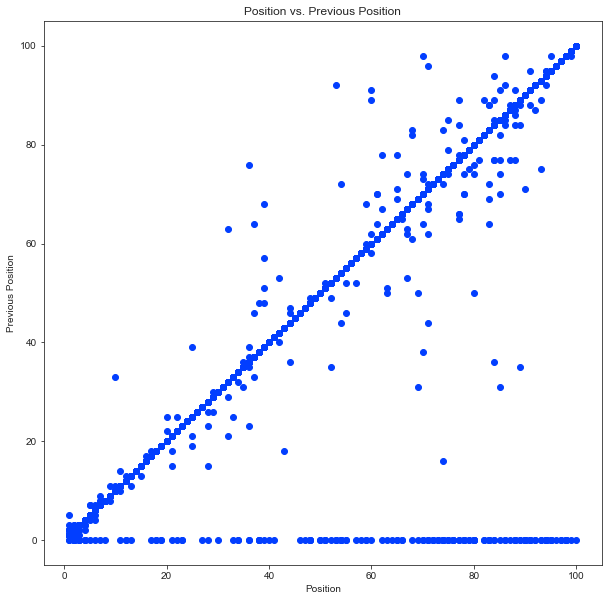

In [34]:
plt.scatter(df['Position'], df['Previous position'])
plt.title("Position vs. Previous Position")
plt.xlabel('Position')
plt.ylabel("Previous Position")
plt.show()

From the scatterplot it is clear that most of the positions are correlated with the previous position, meaning that they are stable. However, there are some that look like they are ranking at 0, which doesn't make sense. That must mean they don't rank in the first 100 positions. Therefore, we want to focus on the first two SERPs.

## Let's visualize the keywords/pages that rank on the first 2 pages of Google. 
These are all very closely correlated.

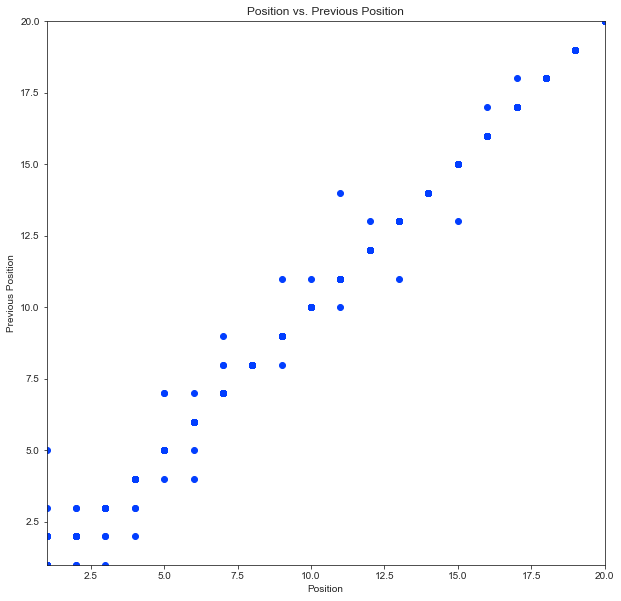

In [35]:
plt.scatter(df['Position'], df['Previous position'])
plt.title("Position vs. Previous Position")
plt.xlabel('Position')
plt.ylabel("Previous Position")
plt.xlim(1, 20,)
plt.ylim(1, 20)
plt.show()

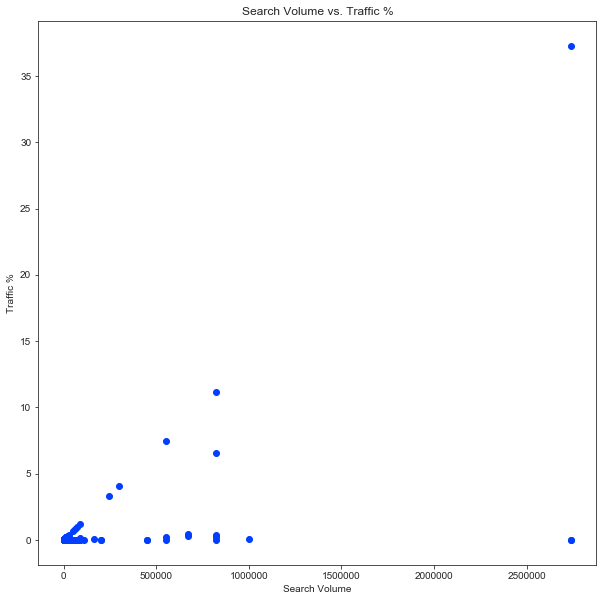

In [36]:
plt.scatter(df['Search Volume'], df['Traffic (%)'])
plt.title("Search Volume vs. Traffic %")
plt.xlabel('Search Volume')
plt.ylabel("Traffic %")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d05f66c408>,
 'caps': [<matplotlib.lines.Line2D at 0x1d05f680f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d05f6618c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d05f634288>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d05f64fa08>],
 'means': []}

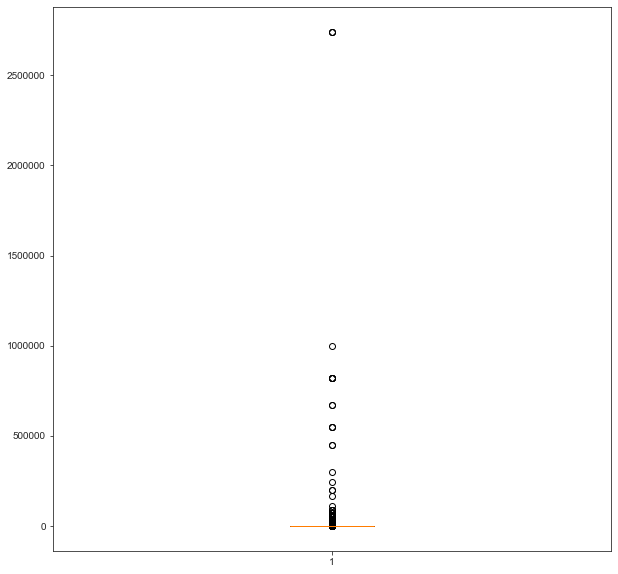

In [37]:
plt.boxplot(df['Search Volume'])

As we can see, most of the keywords have very low search volume, but those that have a high search volume are drastically higher.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d05f61e8c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d05f422f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d05f61ec08>],
 'medians': [<matplotlib.lines.Line2D at 0x1d05f618a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d05f618648>],
 'means': []}

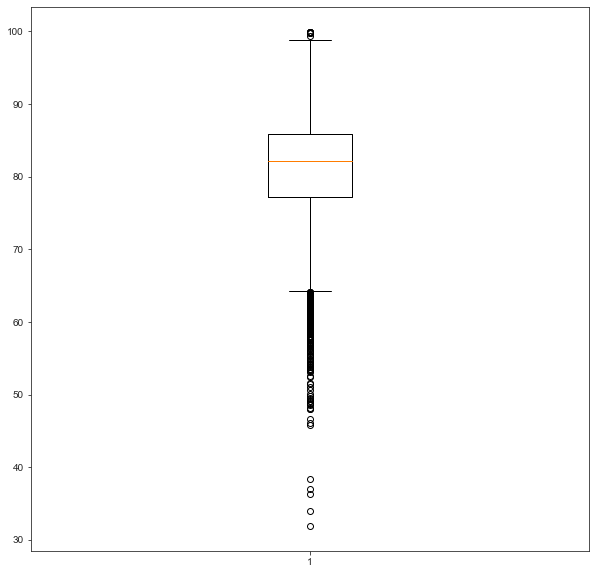

In [38]:
plt.boxplot(df['Keyword Difficulty'])

Most of the keyword difficulty levels look like they are between 70 and 100, but there are a lot of outliers on the lower end.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d05dee8748>,
 'caps': [<matplotlib.lines.Line2D at 0x1d05dec51c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d05ded7d08>],
 'medians': [<matplotlib.lines.Line2D at 0x1d05dec6cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d05dec6bc8>],
 'means': []}

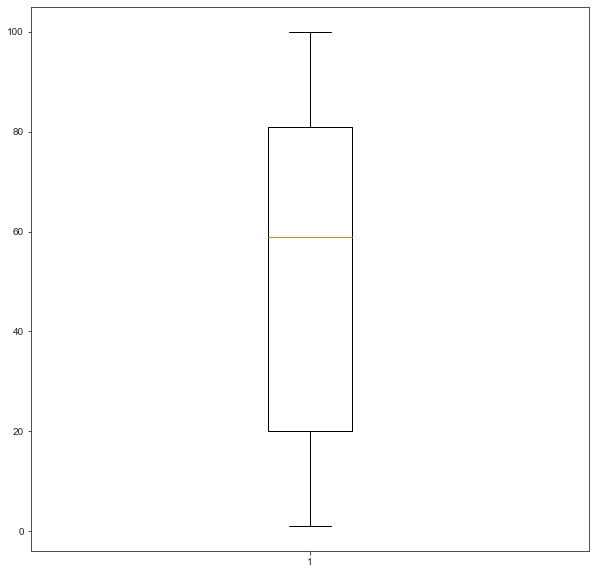

In [39]:
plt.boxplot(df['Position'])

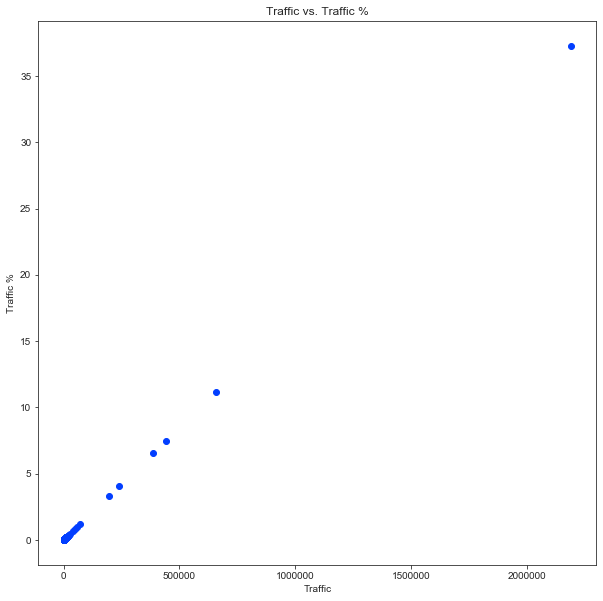

In [40]:
plt.scatter(df['Traffic'], df['Traffic (%)'])
plt.title("Traffic vs. Traffic %")
plt.xlabel('Traffic')
plt.ylabel("Traffic %")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d05c058048>,
 'caps': [<matplotlib.lines.Line2D at 0x1d05c058348>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d05c042748>],
 'medians': [<matplotlib.lines.Line2D at 0x1d05c0598c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d05daf0bc8>],
 'means': []}

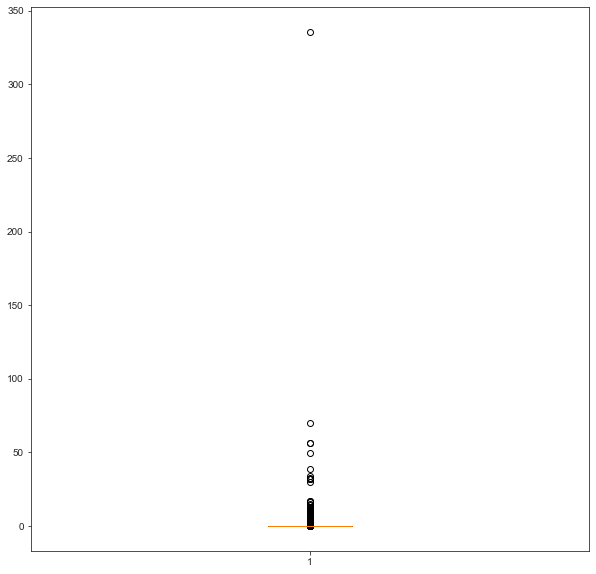

In [42]:
plt.boxplot(df['CPC'])

As we can see, most of the keywords have very low CPC, but there is one keyword that is drastically higher.

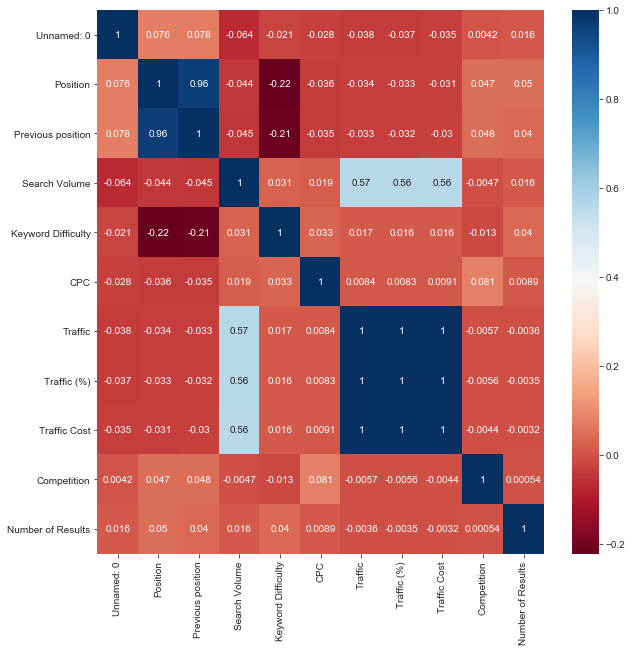

<Figure size 1440x1440 with 0 Axes>

In [43]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='RdBu')
plt.figure(figsize=(20,20))
plt.show()


It looks like Traffic, Traffic% and Traffic cost are colinear. Therefore, it would be best to only include one of these measures in the analysis. We will analyze the traffic raw metric. So now, we'll drop traffic % and Traffic cost.

In [ ]:
df.drop(columns=['Traffic (%)', 'Traffic Cost'], inplace=True)

In [55]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [56]:
df.columns

Index(['Keyword', 'Position', 'Previous position', 'Search Volume',
       'Keyword Difficulty', 'CPC', 'URL', 'Traffic', 'Competition',
       'Number of Results', 'Timestamp'],
      dtype='object')

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Position,10000.0,5.187130e+01,3.297794e+01,1.00,20.0000,59.000,81.00,1.000000e+02
Previous position,10000.0,5.082950e+01,3.340215e+01,0.00,17.0000,57.000,81.00,1.000000e+02
Search Volume,10000.0,2.356532e+03,5.430127e+04,20.00,30.0000,50.000,140.00,2.740000e+06
Keyword Difficulty,10000.0,8.089932e+01,7.046178e+00,31.91,77.2175,82.165,85.86,9.993000e+01
CPC,10000.0,5.497260e-01,3.874393e+00,0.00,0.0000,0.000,0.00,3.356900e+02
Traffic,10000.0,5.308406e+02,2.386606e+04,0.00,0.0000,0.000,0.00,2.192000e+06
Competition,10000.0,1.378440e-01,2.698258e-01,0.00,0.0000,0.010,0.11,1.000000e+00
Number of Results,10000.0,3.259758e+08,1.429064e+09,0.00,91.0000,1465000.000,31300000.00,2.527000e+10


Overall, it looks like there are several outliers in the dataset. It is important to decide whether to drop the extreme values before continuing.

In [60]:
df.to_csv('data_step4.csv')

## Baseline Model
As a simple model for this predictive model, we chose multiple linear regressions. This is a conceptually basic mondel and the interpretation is relatively simple compared to other predictive models. In addition, we can apply the model to other target variables of interest as the research question develops.'

In this multiple regression model, we have to preprocess the data. For continuous variables this means centering and scaling the data by the mean and standard deviation respectively, but for categorical data it includes creating dummy variables.

Then we get rid of variables involving arbitrary dates, such as the timestamp. This will be difficult to handle in a regression context. 


In [1]:
#import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

In [2]:
#import data from wrangling stage
df=pd.read_csv('data_step4.csv')

In [3]:
df.head()
df.drop(columns='Timestamp', inplace=True)


In [4]:
df.head()

,Unnamed: 0,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Competition,Number of Results
0,0,dunkin donuts,1,1,2740000,88.99,2.24,https://www.dunkindonuts.com/,2192000,0.09,35000000
1,1,dunkin donuts near me,1,1,823000,83.58,2.32,https://www.dunkindonuts.com/en/locations,658400,0.01,85
2,2,dunkin donuts menu,1,1,550000,86.33,1.78,https://www.dunkindonuts.com/en/menu,440000,0.02,30200000
3,3,donuts,1,1,823000,81.85,1.54,https://www.dunkindonuts.com/,386810,0.04,321000000
4,4,dd,1,1,301000,84.47,2.53,https://www.dunkindonuts.com/,240800,0.02,871000000


In [5]:
df.dtypes

Unnamed: 0              int64
Keyword                object
Position                int64
Previous position       int64
Search Volume           int64
Keyword Difficulty    float64
CPC                   float64
URL                    object
Traffic                 int64
Competition           float64
Number of Results       int64
dtype: object

Next, the keyword column will be separated because it is the label column. This will be dropped from the preprocessed data as it will not be entered into the regression model.

In [6]:
df1=df.drop(columns='Keyword')
keyword=df['Keyword']
df1.head()
df1.drop(columns='Unnamed: 0')
df1.columns

Index(['Unnamed: 0', 'Position', 'Previous position', 'Search Volume',
       'Keyword Difficulty', 'CPC', 'URL', 'Traffic', 'Competition',
       'Number of Results'],
      dtype='object')

In [7]:
continuous_var=df1.drop(columns='URL')

continuous_var.drop(columns='Unnamed: 0', inplace=True)
continuous_var.head()


,Position,Previous position,Search Volume,Keyword Difficulty,CPC,Traffic,Competition,Number of Results
0,1,1,2740000,88.99,2.24,2192000,0.09,35000000
1,1,1,823000,83.58,2.32,658400,0.01,85
2,1,1,550000,86.33,1.78,440000,0.02,30200000
3,1,1,823000,81.85,1.54,386810,0.04,321000000
4,1,1,301000,84.47,2.53,240800,0.02,871000000


In [8]:
cat_var=['URL']
continuous_var.head()

,Position,Previous position,Search Volume,Keyword Difficulty,CPC,Traffic,Competition,Number of Results
0,1,1,2740000,88.99,2.24,2192000,0.09,35000000
1,1,1,823000,83.58,2.32,658400,0.01,85
2,1,1,550000,86.33,1.78,440000,0.02,30200000
3,1,1,823000,81.85,1.54,386810,0.04,321000000
4,1,1,301000,84.47,2.53,240800,0.02,871000000


## Preprocessing

The continuous variables will be scaled and centered, since many predictive models perform better when all variables have a similar average and variance. In addition, we ensure there are no missing rows or columns, which we already established. Next, the independent variables are placed in an array (x) and target variable (position) is placed in a second array (y).

In [9]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(continuous_var))
df_scaled.columns
df_scaled.head()





,0,1,2,3,4,5,6,7
0,-1.542663,-1.49188,50.418352,1.148294,0.436290,91.828251,-0.177323,-0.203623
1,-1.542663,-1.49188,15.113543,0.380464,0.456939,27.566427,-0.473826,-0.228116
2,-1.542663,-1.49188,10.085784,0.770766,0.317556,18.414899,-0.436763,-0.206982
3,-1.542663,-1.49188,15.113543,0.134928,0.255607,16.186100,-0.362637,-0.003482
4,-1.542663,-1.49188,5.500026,0.506780,0.511144,10.067902,-0.436763,0.381404


In [10]:
df_scaled.columns=[ 'Position', 'Previous position', 'Search Volume',
       'Keyword Difficulty', 'CPC', 'Traffic', 'Competition',
       'Number of Results']

In [11]:
df_scaled['URL'] = df1[cat_var]

In [12]:
df_scaled.head()
df_new = pd.get_dummies(df_scaled,dummy_na=True)
X=df_new.drop(columns='Position')
y=df_new['Position']

## Training and Testing the Model
Next, we split the data into training and testing sets The training set will be used to cross_validate the hyperparameters for the model and the testing set will be used to validate the model.

First, I will make a model with default parameters.


In [13]:
#Split into test/train
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)


In [14]:
# with sklearn
regr = LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred=regr.predict(X_test)

In [16]:
explained_variance_score(y_test, y_pred)

-6.675009881291173e+21

It looks like the URL column is skewing the model. Now lets try to drop the URL column and run the model again.


In [17]:
df_scaled.head()

,Position,Previous position,Search Volume,Keyword Difficulty,CPC,Traffic,Competition,Number of Results,URL
0,-1.542663,-1.49188,50.418352,1.148294,0.436290,91.828251,-0.177323,-0.203623,https://www.dunkindonuts.com/
1,-1.542663,-1.49188,15.113543,0.380464,0.456939,27.566427,-0.473826,-0.228116,https://www.dunkindonuts.com/en/locations
2,-1.542663,-1.49188,10.085784,0.770766,0.317556,18.414899,-0.436763,-0.206982,https://www.dunkindonuts.com/en/menu
3,-1.542663,-1.49188,15.113543,0.134928,0.255607,16.186100,-0.362637,-0.003482,https://www.dunkindonuts.com/
4,-1.542663,-1.49188,5.500026,0.506780,0.511144,10.067902,-0.436763,0.381404,https://www.dunkindonuts.com/


In [18]:
df_scaled.drop(columns='URL', inplace=True)

In [19]:
X2=df_scaled.drop(columns='Position')
y2=df_scaled['Position']

In [20]:
#Split into test/train
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.2, random_state=42)

In [21]:
# with sklearn
regr2 = LinearRegression()
regr2.fit(X_train2, y_train2)

print('Intercept: \n', regr2.intercept_)
print('Coefficients: \n', regr2.coef_)

Intercept: 
 -0.000978581584977256
Coefficients: 
 [ 0.96177721  0.01754652 -0.01799402 -0.00141528 -0.01720571  0.00117578
  0.01394046]


In [22]:
y_pred2=regr2.predict(X_test2)

In [23]:
explained_variance_score(y_test2, y_pred2)

0.9101729847536906

## Baseline Model
As a simple model for this predictive model, we chose multiple linear regressions. This is a conceptually basic mondel and the interpretation is relatively simple compared to other predictive models. In addition, we can apply the model to other target variables of interest as the research question develops.'

In this multiple regression model, we have to preprocess the data. For continuous variables this means centering and scaling the data by the mean and standard deviation respectively, but for categorical data it includes creating dummy variables.

Then we get rid of variables involving arbitrary dates, such as the timestamp. This will be difficult to handle in a regression context. 


#import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#import data from wrangling stage
df=pd.read_csv('data_step4.csv')

In [10]:
df.head()
df.drop(columns='Timestamp', inplace=True)


In [11]:
df.head()

,Unnamed: 0,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Competition,Number of Results
0,0,dunkin donuts,1,1,2740000,88.99,2.24,https://www.dunkindonuts.com/,2192000,0.09,35000000
1,1,dunkin donuts near me,1,1,823000,83.58,2.32,https://www.dunkindonuts.com/en/locations,658400,0.01,85
2,2,dunkin donuts menu,1,1,550000,86.33,1.78,https://www.dunkindonuts.com/en/menu,440000,0.02,30200000
3,3,donuts,1,1,823000,81.85,1.54,https://www.dunkindonuts.com/,386810,0.04,321000000
4,4,dd,1,1,301000,84.47,2.53,https://www.dunkindonuts.com/,240800,0.02,871000000


In [12]:
df.dtypes

Unnamed: 0              int64
Keyword                object
Position                int64
Previous position       int64
Search Volume           int64
Keyword Difficulty    float64
CPC                   float64
URL                    object
Traffic                 int64
Competition           float64
Number of Results       int64
dtype: object

Next, the keyword column will be separated because it is the label column. This will be dropped from the preprocessed data as it will not be entered into the regression model.

In [13]:
df1=df.drop(columns='Keyword')
keyword=df['Keyword']
df1.head()
df1.drop(columns='Unnamed: 0')
df1.columns

Index(['Unnamed: 0', 'Position', 'Previous position', 'Search Volume',
       'Keyword Difficulty', 'CPC', 'URL', 'Traffic', 'Competition',
       'Number of Results'],
      dtype='object')

In [14]:
continuous_var=df1.drop(columns='URL')

continuous_var.drop(columns='Unnamed: 0', inplace=True)
continuous_var.head()


,Position,Previous position,Search Volume,Keyword Difficulty,CPC,Traffic,Competition,Number of Results
0,1,1,2740000,88.99,2.24,2192000,0.09,35000000
1,1,1,823000,83.58,2.32,658400,0.01,85
2,1,1,550000,86.33,1.78,440000,0.02,30200000
3,1,1,823000,81.85,1.54,386810,0.04,321000000
4,1,1,301000,84.47,2.53,240800,0.02,871000000


In [15]:
cat_var=['URL']
continuous_var.head()

,Position,Previous position,Search Volume,Keyword Difficulty,CPC,Traffic,Competition,Number of Results
0,1,1,2740000,88.99,2.24,2192000,0.09,35000000
1,1,1,823000,83.58,2.32,658400,0.01,85
2,1,1,550000,86.33,1.78,440000,0.02,30200000
3,1,1,823000,81.85,1.54,386810,0.04,321000000
4,1,1,301000,84.47,2.53,240800,0.02,871000000


## Preprocessing

The continuous variables will be scaled and centered, since many predictive models perform better when all variables have a similar average and variance. In addition, we ensure there are no missing rows or columns, which we already established. Next, the independent variables are placed in an array (x) and target variable (position) is placed in a second array (y).

In [16]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(continuous_var))
df_scaled.columns
df_scaled.head()





,0,1,2,3,4,5,6,7
0,-1.542663,-1.49188,50.418352,1.148294,0.436290,91.828251,-0.177323,-0.203623
1,-1.542663,-1.49188,15.113543,0.380464,0.456939,27.566427,-0.473826,-0.228116
2,-1.542663,-1.49188,10.085784,0.770766,0.317556,18.414899,-0.436763,-0.206982
3,-1.542663,-1.49188,15.113543,0.134928,0.255607,16.186100,-0.362637,-0.003482
4,-1.542663,-1.49188,5.500026,0.506780,0.511144,10.067902,-0.436763,0.381404


In [17]:
df_scaled.columns=[ 'Position', 'Previous position', 'Search Volume',
       'Keyword Difficulty', 'CPC', 'Traffic', 'Competition',
       'Number of Results']

In [18]:
df_scaled['URL'] = df1[cat_var]

In [19]:
df_scaled.head()
df_new = pd.get_dummies(df_scaled,dummy_na=True)
X=df_new.drop(columns='Position')
y=df_new['Position']

## Training and Testing the Model
Next, we split the data into training and testing sets The training set will be used to cross_validate the hyperparameters for the model and the testing set will be used to validate the model.

First, I will make a model with default parameters.


In [22]:
#Split into test/train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)


In [23]:
# with sklearn
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 16215319062.667843
Coefficients: 
 [ 9.43617476e-01  1.10099437e-02 -2.02629560e-02 -9.24775651e-04
 -1.57226366e-02  2.69680597e-03  9.06214496e-03 -1.62153191e+10
  2.96696590e+12 -1.62153191e+10 -1.62153191e+10 -1.62153191e+10
  2.15738752e+11  3.77941663e+11  3.86828305e+10 -1.62153191e+10
 -1.62153191e+10  1.69782246e+11 -1.62153191e+10 -1.62153191e+10
 -1.62153191e+10 -1.62153191e+10 -1.62153191e+10 -1.62153191e+10
 -7.45925635e+10 -1.62153191e+10  3.92938262e+10 -1.62153191e+10
 -1.62153191e+10 -1.62153191e+10  3.04326847e+11 -1.62153191e+10
 -1.62153191e+10 -2.02759815e+11 -1.62153191e+10 -1.62153191e+10
 -1.62153191e+10 -1.62153191e+10 -1.62153191e+10 -1.62153191e+10
 -1.62153191e+10 -1.62153191e+10 -1.17195282e+11 -1.62153191e+10
  3.32438526e+11 -1.83628173e+11 -6.01441283e+09 -1.62153191e+10
 -1.62153191e+10 -1.62153191e+10 -1.62153191e+10 -1.62153191e+10
 -1.62153191e+10 -1.62153191e+10 -1.62153191e+10 -1.62153191e+10
 -1.62153191e+10 -1.62153191e+10 -1.621531

In [24]:
y_pred=regr.predict(X_test)

In [39]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3081993102.57 degrees.
Accuracy: -62395689130.96 %.


It looks like the URL column is skewing the model. Now lets try to drop the URL column and run the model again.


In [27]:
df_scaled.head()

,Position,Previous position,Search Volume,Keyword Difficulty,CPC,Traffic,Competition,Number of Results,URL
0,-1.542663,-1.49188,50.418352,1.148294,0.436290,91.828251,-0.177323,-0.203623,https://www.dunkindonuts.com/
1,-1.542663,-1.49188,15.113543,0.380464,0.456939,27.566427,-0.473826,-0.228116,https://www.dunkindonuts.com/en/locations
2,-1.542663,-1.49188,10.085784,0.770766,0.317556,18.414899,-0.436763,-0.206982,https://www.dunkindonuts.com/en/menu
3,-1.542663,-1.49188,15.113543,0.134928,0.255607,16.186100,-0.362637,-0.003482,https://www.dunkindonuts.com/
4,-1.542663,-1.49188,5.500026,0.506780,0.511144,10.067902,-0.436763,0.381404,https://www.dunkindonuts.com/


In [28]:
df_scaled.drop(columns='URL', inplace=True)

In [29]:
X2=df_scaled.drop(columns='Position')
y2=df_scaled['Position']

In [30]:
#Split into test/train
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.2, random_state=42)

In [31]:
# with sklearn
regr2 = LinearRegression()
regr2.fit(X_train2, y_train2)

print('Intercept: \n', regr2.intercept_)
print('Coefficients: \n', regr2.coef_)

Intercept: 
 -0.000978581584977256
Coefficients: 
 [ 0.96177721  0.01754652 -0.01799402 -0.00141528 -0.01720571  0.00117578
  0.01394046]


In [32]:
y_pred2=regr2.predict(X_test2)

In [37]:
explained_variance_score(y_test2, y_pred2)

0.9101729847536906

In [38]:
# Calculate the absolute errors
errors = abs(y_pred2 - y_test2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test2)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.09 degrees.
Accuracy: 93.02 %.


## Random Forest Regression
Next we will try a Random Forest Regression model.

In [34]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train2);

In [35]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test2)
# Calculate the absolute errors
errors = abs(predictions - y_test2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.02 degrees.


In [36]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test2)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 97.57 %.


According to the MAE and accuracy scores, the Random Forest Regression outperformed the linear regression model. Therefore, we retain this model.

| Model | MAE | Accuracy |
| --- | --- | --- |
| Linear Regression (BL) | 3081993102.57 degrees | -62395689130.96 % |
| Linear Regression 2 | .09 degrees | 93.02% |
| Random Forest Regression | .02 degrees | 97.57% |

## Analysis
The winning model is the Random Forest Regression because it has the lowest MAE and highest accuracy. It also drops the URL column which appeared to be skewing the results of the first regression. This will allow us to predict the position for new keywords for Dunkin Donuts. The next step is to go on Answerthepublic and Google Keyword Planner and pull the relevant keywords and then plug the information into this model to determine which has the potential to rank highest for Dunkin. Then the MD can focus on promoting that keyword with a comprehensive SEO campaign.